In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import panel as pn
import plotly.express as px
import plotly.io as pio
import datetime as dt

# pn.extension('plotly')
# import hvplot.pandas
# pd.options.display.float_format = '{:.6f}%'.format


In [2]:
df = pd.read_csv('NCDHHS_7-13-20.csv')
df


,Living_Situation,Cases,Deaths
0,Nursing Home,4935,696
1,Residential Care Facility,1500,122
2,Correctional Facility,1816,32
3,Other,448,5
4,Not in a Congregate Living,43953,467
5,Missing Data,33049,181


In [3]:
df.set_index('Living_Situation',inplace=True)

In [4]:
df['Congregate_Living']=['Congregate Living', 'Congregate Living', 'Congregate Living','Not in Congregate Living', 'Not in Congregate Living', 'Not in Congregate Living']
df

,Cases,Deaths,Congregate_Living
Living_Situation,,,
Nursing Home,4935,696,Congregate Living
Residential Care Facility,1500,122,Congregate Living
Correctional Facility,1816,32,Congregate Living
Other,448,5,Not in Congregate Living
Not in a Congregate Living,43953,467,Not in Congregate Living
Missing Data,33049,181,Not in Congregate Living


In [5]:
df['%ofDeaths'] = df.Cases / df.Deaths.sum()
df['%TotalDeaths'] = df.Deaths/df.Deaths.sum() 


In [6]:
# As of 2019 NC total population is 10.49 million
population = 10500000
df['%TotalPopulation'] = (df.Deaths/population) 
df['%TotalCases'] = df.Cases/df.Cases.sum() 
df['%TotalPop/Cases'] = (df.Cases/population) 
df

,Cases,Deaths,Congregate_Living,%ofDeaths,%TotalDeaths,%TotalPopulation,%TotalCases,%TotalPop/Cases
Living_Situation,,,,,,,,
Nursing Home,4935,696,Congregate Living,3.283433,0.463074,6.628571e-05,0.057584,0.000470
Residential Care Facility,1500,122,Congregate Living,0.998004,0.081171,1.161905e-05,0.017503,0.000143
Correctional Facility,1816,32,Congregate Living,1.208250,0.021291,3.047619e-06,0.021190,0.000173
Other,448,5,Not in Congregate Living,0.298071,0.003327,4.761905e-07,0.005227,0.000043
Not in a Congregate Living,43953,467,Not in Congregate Living,29.243513,0.310712,4.447619e-05,0.512864,0.004186
Missing Data,33049,181,Not in Congregate Living,21.988689,0.120426,1.723810e-05,0.385631,0.003148


In [7]:
df_grouped = df.groupby('Congregate_Living').sum()
df_grouped

,Cases,Deaths,%ofDeaths,%TotalDeaths,%TotalPopulation,%TotalCases,%TotalPop/Cases
Congregate_Living,,,,,,,
Congregate Living,8251,850,5.489687,0.565536,0.000081,0.096277,0.000786
Not in Congregate Living,77450,653,51.530273,0.434464,0.000062,0.903723,0.007376


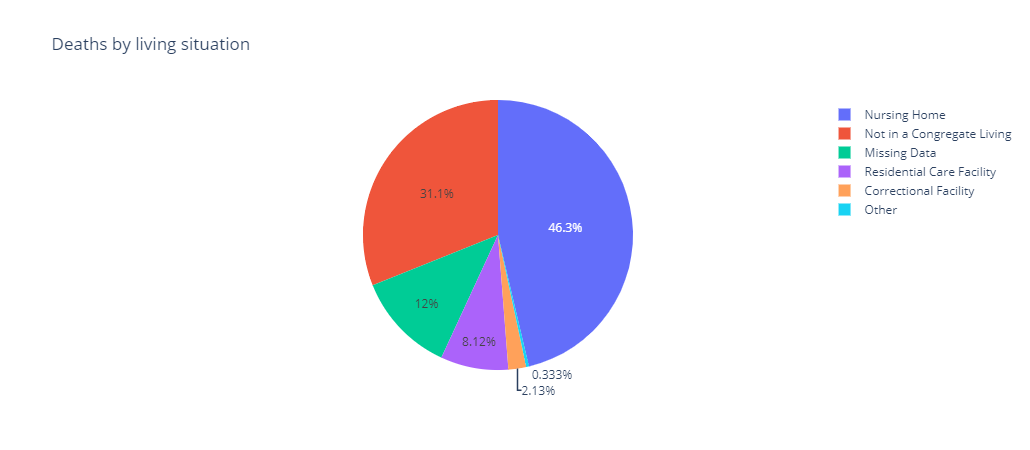

In [8]:
fig = px.pie(df.reset_index(), values='Deaths',names = 'Living_Situation', title='Deaths by living situation')
fig.show()

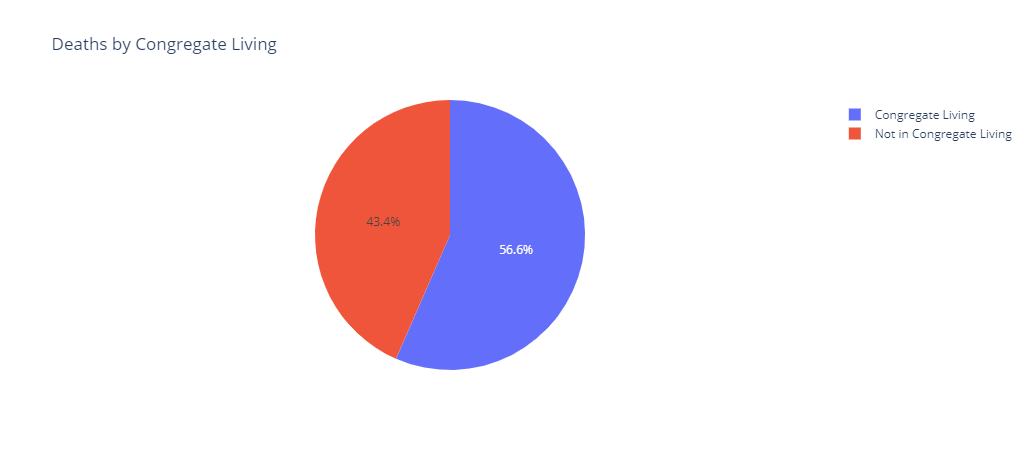

In [9]:
fig = px.pie(df_grouped.reset_index(), values='Deaths',names = 'Congregate_Living', title='Deaths by Congregate Living')
fig.show()

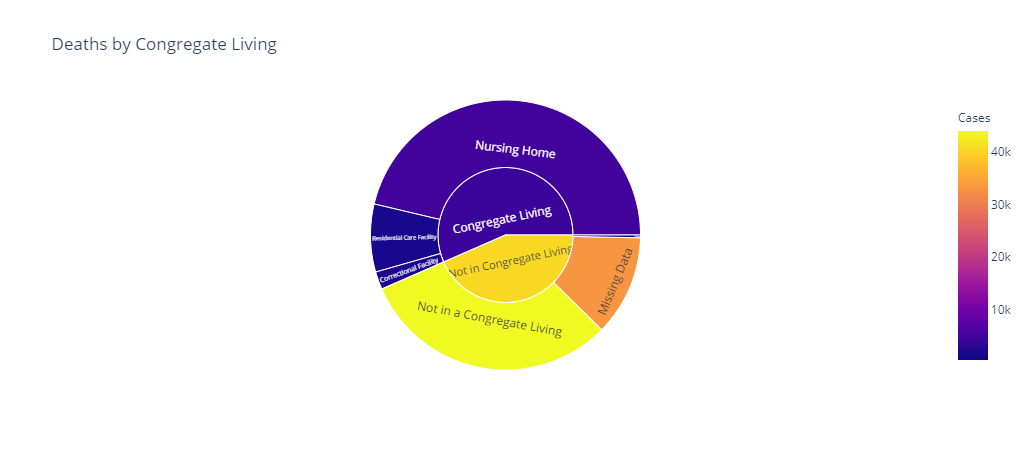

In [10]:
fig = px.sunburst(df.reset_index(), path=['Congregate_Living', 'Living_Situation'], values='Deaths',
                  color='Cases', hover_data=['Deaths'], title = 'Deaths by Congregate Living')
fig.show()

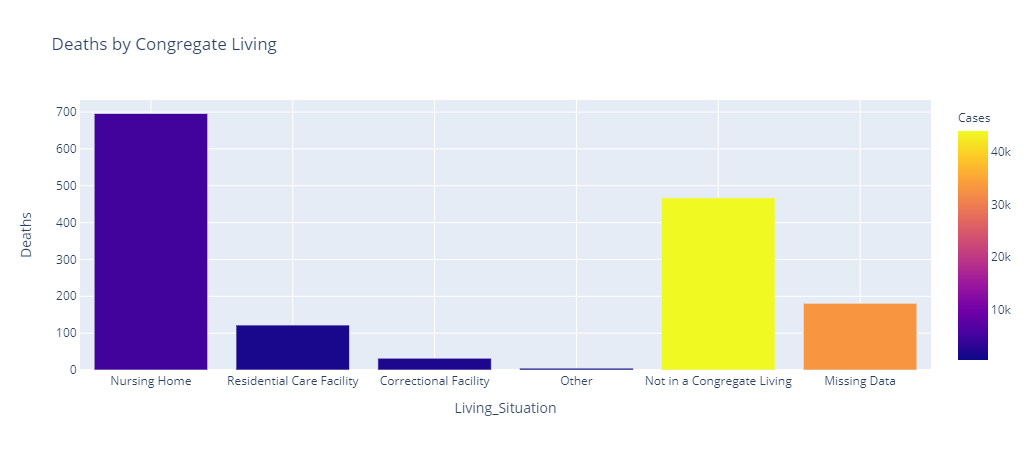

In [11]:
fig = px.bar(df.reset_index(), x='Living_Situation',y = 'Deaths', color = 'Cases', title='Deaths by Congregate Living')
fig.show()
# pio.write_html(fig, file='Deaths_by_CLS.html', auto_open=True)

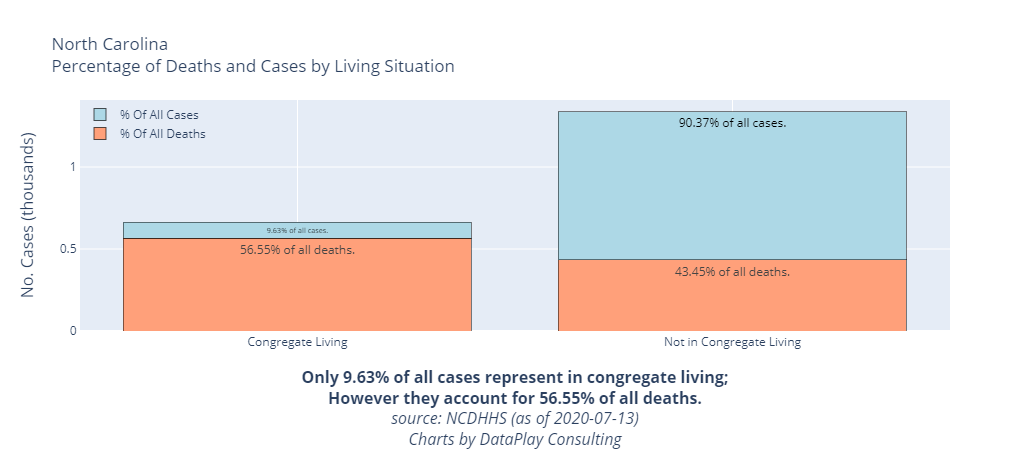

In [12]:
import plotly.graph_objects as go
Total_Cases = '{:.2%}'.format(df_grouped.reset_index()['%TotalCases'][0])
Total_Deaths = '{:.2%}'.format(df_grouped.reset_index()['%TotalDeaths'][0])
Date = dt.date.today()
fig = go.Figure(data=[
    go.Bar(name = '% Of All Deaths', x=df_grouped.reset_index()['Congregate_Living'],
           y = df_grouped.reset_index()['%TotalDeaths'],
           text=['{:.2%}'.format(df_grouped.reset_index()['%TotalDeaths'][0])+' of all deaths.','{:.2%}'.format(df_grouped.reset_index()['%TotalDeaths'][1])+' of all deaths.'],
           marker_color='lightsalmon',
           textposition='inside',marker_line_color='black'),
    
    go.Bar(name = '% Of All Cases', x=df_grouped.reset_index()['Congregate_Living'],
           y = df_grouped.reset_index()['%TotalCases'],
           text=['{:.2%}'.format(df_grouped.reset_index()['%TotalCases'][0])+' of all cases.','{:.2%}'.format(df_grouped.reset_index()['%TotalCases'][1])+' of all cases.'],
           marker_color='lightblue',
           textposition='inside',marker_line_color='black', 
           textfont=dict(color="black"))
])
# Change the bar mode
fig.update_layout(barmode='stack', title = 'North Carolina<br>Percentage of Deaths and Cases by Living Situation',
    yaxis=dict(
        title='No. Cases (thousands)',
        titlefont_size=16,
        tickfont_size=12,
    ),
    xaxis=dict(
        title=f'<b>Only {Total_Cases} of all cases represent in congregate living;<br>However they account for {Total_Deaths} of all deaths.</b><br><i>source: NCDHHS (as of {Date})<br>Charts by DataPlay Consulting</i>',
        titlefont_size=16,
        tickfont_size=12,
    ),              
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()
pio.write_html(fig, file='Deaths_Cases_Living_Situation.html', auto_open=False)

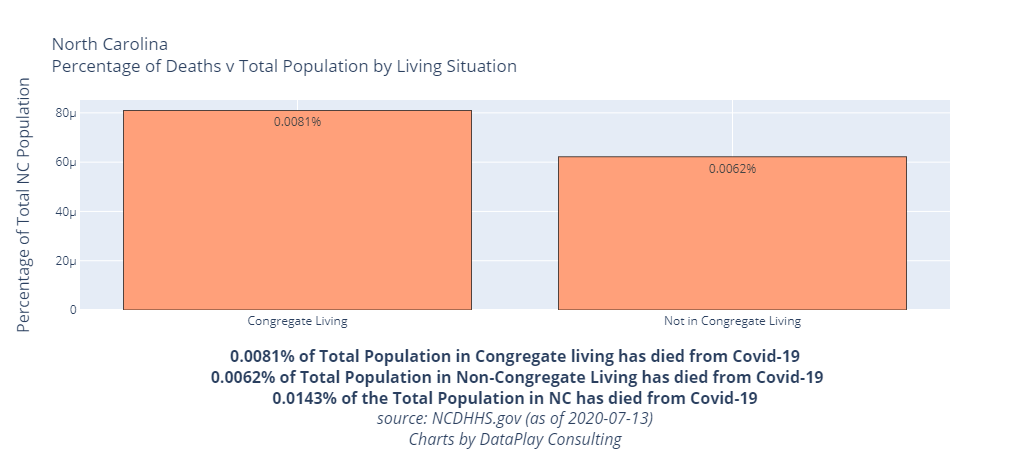

In [13]:
Total_Deaths_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPopulation'][0])
Total_Deaths_Non_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPopulation'][1])
Total_Deaths = '{:.4%}'.format(df_grouped.reset_index()['%TotalPopulation'].sum())

fig = go.Figure(data=[
     go.Bar(name = '% Of All Deaths', x=df_grouped.reset_index()['Congregate_Living'],
           y = df_grouped.reset_index()['%TotalPopulation'],
           text=[Total_Deaths_Congregate, Total_Deaths_Non_Congregate],
           marker_color='lightsalmon',
           textposition='inside',marker_line_color='black'),
#     go.Bar(name = '% Of All Cases', x=df_grouped.reset_index()['Congregate_Living'],y = df_grouped.reset_index()['%TotalPop/Cases'],text=['11% of All Cases', '89% of All Cases'],marker_color='lightblue',
#             textposition='inside',marker_line_color='black', textfont=dict(color="black"), hoverinfo='none')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'North Carolina<br>Percentage of Deaths v Total Population by Living Situation',
    yaxis=dict(
        title='Percentage of Total NC Population',
        titlefont_size=16,
        tickfont_size=12,
    ),
    xaxis=dict(
        title=f"<b>{Total_Deaths_Congregate} of Total Population in Congregate living has died from Covid-19<br> {Total_Deaths_Non_Congregate} of Total Population in Non-Congregate Living has died from Covid-19<br>{Total_Deaths} of the Total Population in NC has died from Covid-19</b><br><i>source: NCDHHS.gov (as of {Date})<br>Charts by DataPlay Consulting</i>",
        titlefont_size=16,
        tickfont_size=12,
    ),              
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()
pio.write_html(fig, file='DeathsVPopulation.html', auto_open=False)

In [14]:
df_grouped.reset_index()

,Congregate_Living,Cases,Deaths,%ofDeaths,%TotalDeaths,%TotalPopulation,%TotalCases,%TotalPop/Cases
0,Congregate Living,8251,850,5.489687,0.565536,0.000081,0.096277,0.000786
1,Not in Congregate Living,77450,653,51.530273,0.434464,0.000062,0.903723,0.007376


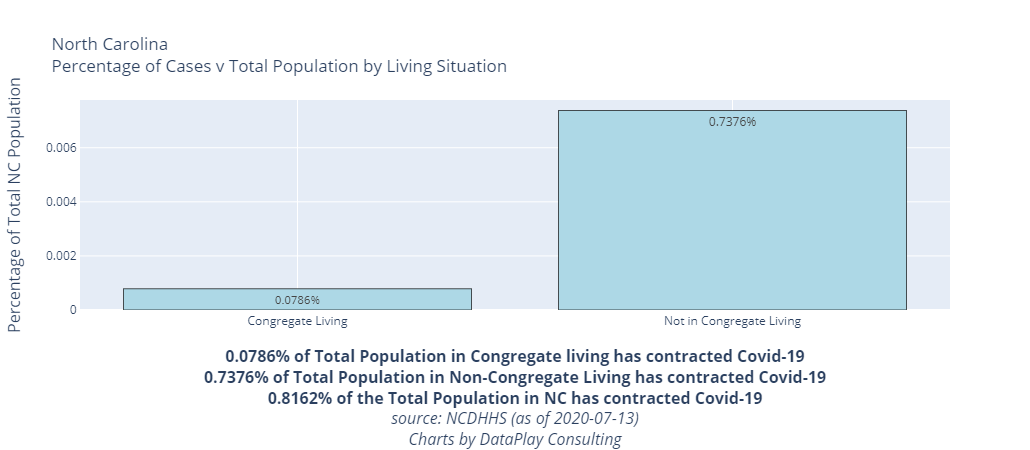

In [15]:
Total_Cases_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPop/Cases'][0])
Total_Cases_Non_Congregate = '{:.4%}'.format(df_grouped.reset_index()['%TotalPop/Cases'][1])
Total_Cases = '{:.4%}'.format(df_grouped.reset_index()['%TotalPop/Cases'].sum())

fig = go.Figure(data=[
    go.Bar(name = '% Of All Deaths', x=df_grouped.reset_index()['Congregate_Living'],y = df_grouped.reset_index()['%TotalPop/Cases'], text=[Total_Cases_Congregate, Total_Cases_Non_Congregate],marker_color='lightblue',
            textposition='inside',marker_line_color='black')
#     go.Bar(name = '% Of All Cases', x=df_grouped.reset_index()['Congregate_Living'],y = df_grouped.reset_index()['%TotalPop/Cases'],text=['11% of All Cases', '89% of All Cases'],marker_color='lightblue',
#             textposition='inside',marker_line_color='black', textfont=dict(color="black"), hoverinfo='none')
])
# Change the bar mode
fig.update_layout(barmode='group', title = 'North Carolina<br>Percentage of Cases v Total Population by Living Situation',
    yaxis=dict(
        title='Percentage of Total NC Population',
        titlefont_size=16,
        tickfont_size=12,
    ),
    xaxis=dict(
        title=f"<b>{Total_Cases_Congregate} of Total Population in Congregate living has contracted Covid-19<br>{Total_Cases_Non_Congregate} of Total Population in Non-Congregate Living has contracted Covid-19<br>{Total_Cases} of the Total Population in NC has contracted Covid-19</b><br><i>source: NCDHHS (as of {Date})<br>Charts by DataPlay Consulting</i>",
        titlefont_size=16,
        tickfont_size=12,
    ),              
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ))

fig.show()
pio.write_html(fig, file='CasesVPopulation.html', auto_open=False)